**Title:** Predicting Customer Churn in SaaS Businesses: Based on Subscription-Based Services

**Author:** Lisha Sridhar

**Date:** 18 January, 2025

**Description:** This project aims to predict customer churn in SaaS businesses by analyzing key customer attributes such as usage frequency, support calls, and subscription type. Using machine learning techniques, the model identifies high-risk customers and provides actionable insights to reduce churn and improve customer retention.

**Tags:** [SaaS, Customer Churn Prediction, Data Science, Machine Learning, Customer Retention, Predictive, Analytics, Subscription-Based Services, Churn Model, Customer Segmentation]











In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Predicting Customer Churn in SaaS Businesses: Based on Subscription-Based Services**

**Introduction:**

Customer churn prediction is a critical aspect of business strategy, as retaining existing customers is far more cost-effective than acquiring new ones. This project aims to predict the likelihood of customers leaving a subscription-based service using various customer attributes. By leveraging machine learning techniques, the project will help identify high-risk customers and allow the company to take preemptive actions to retain them, thereby enhancing customer satisfaction and reducing churn rates. This analysis also uncovers valuable insights into the factors driving churn and customer retention.

**Objectives:**

1. **Predict Customer Churn:** Develop a model that predicts the probability of a customer churning based on available attributes such as age, gender, tenure, and subscription type.
2. **Understand Churn Factors:** Analyze and identify the key features that influence churn, including factors like usage frequency, support calls, and payment delays.
3. **Optimize Retention Strategies:** Provide insights that can help the company tailor retention strategies and customer engagement to reduce churn.
4.**Improve Customer Lifetime Value (CLV):** By targeting high-risk customers with personalized interventions, increase customer retention and overall revenue.

**Methodology:**
1. **Data Preprocessing:** Clean and prepare the data by handling missing values, encoding categorical variables, and normalizing numerical features.
2. **Exploratory Data Analysis (EDA):** Perform EDA to understand the distribution and relationships between features, and identify any potential patterns or correlations.
3. **Feature Engineering:** Create new features or modify existing ones to improve model performance. For example, transforming "Last Interaction" into an engagement level score or creating customer loyalty metrics.
4. **Model Selection:** Implement machine learning models such as:
      
      (i) K Nearest Neighbours
      
      (ii) Naive Bayes
      
      (iii)Decision Tree
      
      (iV) XGBoost
5. **Model Evaluation:** Evaluate the model using appropriate metrics such as accuracy, precision, recall, F1-score, and AUC-ROC curve to assess prediction performance.
6. **Hyperparameter Tuning:** Use techniques like Grid Search or Random Search to fine-tune the model parameters and optimize performance.
7. **Insights and Reporting:** Provide actionable insights based on model predictions, including high-risk customer segments and feature importance.

**Data Set:** https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset/data?select=customer_churn_dataset-testing-master.csv


**Variables:**

1. **Customer Age:** The age of the customer.
2. **Gender:** The gender of the customer (Male, Female).
3. **Tenure:** Length of time (in months) the customer has been subscribed to the service.
4. **Usage Frequency:** Frequency of service use in 1 month.
5. **Support Calls:** Number of customer support interactions.
6. **Payment Delay:** Days the customer is late in making payments.
7. **Subscription Type:** Type of subscription (Basic, Standard, Premium).
8. **Contract Length:** Length of the customer’s contract (Monthly, Quarterly, Annual).
9. **Total Spend:** Total amount of money spent by the customer.
10. **Last Interaction:** Number of days (in one month) since the last interaction with the customer.
11. **Churn:** Target variable indicating whether the customer has churned (1 = Churned, 0 = Retained).

**Expected Output:**

1. **Churn Prediction Model:** A robust predictive model that estimates the likelihood of churn for each customer.
2. **Churn Rate Insights:** A detailed analysis of which customers are at the highest risk of leaving the service and why.
3. **Key Drivers of Churn:** Identified factors that most influence customer churn, such as subscription type, usage frequency, and support calls.
4. **Retention Strategy Recommendations:** Actionable strategies to reduce churn, such as personalized offers or better support for at-risk customers.
5. **Customer Segmentation:** Segment customers into groups based on churn probability, allowing for targeted retention efforts.
6. **Visualizations:** Interactive dashboards and visualizations to present findings in an understandable format for business stakeholders.


# Data Preprocessing


##Loading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/customer_churn_dataset-testing-master.csv')

##Initial Data Inspection

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [4]:
df.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1
64373,64374,52,Female,45,15,9,25,Standard,Monthly,696,22,1


In [5]:
#Check the number of rows and columns using .shape.
df.shape

(64374, 12)

In [6]:
#Review the column names and data types with .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [7]:
#Using .describe() to summarize key statistics for numerical columns.
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


##Handle Missing Data

In [8]:
#Checking for missing values
missing_values=df.isnull().sum()
print(missing_values)

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


##Checking & Handling Duplicates

In [9]:
#Detect duplicate rows using .duplicated().
duplicate = df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [CustomerID, Age, Gender, Tenure, Usage Frequency, Support Calls, Payment Delay, Subscription Type, Contract Length, Total Spend, Last Interaction, Churn]
Index: []


In [10]:
#Counting the number of duplicated rows
df.duplicated().sum()

np.int64(0)

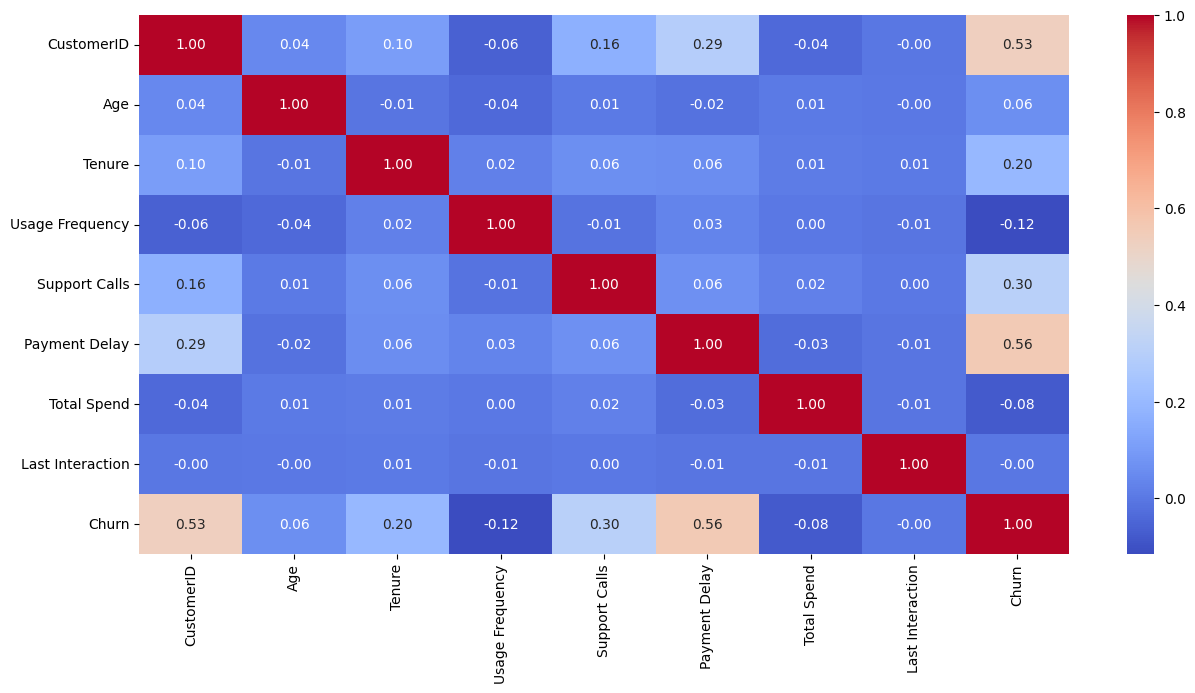

In [11]:
# Correlation matrix for numerical variables
numerical_df = df.select_dtypes(include=np.number)  # Select only numerical columns
plt.figure(figsize=(15, 7))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

##Handling Data Types

In [12]:
df['Churn'] = df['Churn'].astype(int)

###One Hot Encoding - Gender

In [13]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

###Label Encoding - Subscription Types

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Subscription Type'] = le.fit_transform(df['Subscription Type'])

###Ordinnal Encoding - Contract Length

In [15]:
from sklearn.preprocessing import OrdinalEncoder

contract_mapping = {
    'Monthly': 1,
    'Quarterly': 2,
    'Annual': 3
}

df['Contract Length'] = df['Contract Length'].map(contract_mapping)

###Checking the encoding

In [16]:
df.head()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Gender_Male
0,1,22,25,14,4,27,0,1,598,9,1,False
1,2,41,28,28,7,13,2,1,584,20,0,False
2,3,47,27,10,2,29,1,3,757,21,0,True
3,4,35,9,12,5,17,1,2,232,18,0,True
4,5,53,58,24,9,2,2,3,533,18,0,False


##Feature Engineering

### Drop Non-Useful Features

In [17]:
#Dropping of CustomerID
df = df.drop('CustomerID', axis=1)

In [18]:
df.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Gender_Male
0,22,25,14,4,27,0,1,598,9,1,False
1,41,28,28,7,13,2,1,584,20,0,False
2,47,27,10,2,29,1,3,757,21,0,True
3,35,9,12,5,17,1,2,232,18,0,True
4,53,58,24,9,2,2,3,533,18,0,False


###Creating New Features

####Customer Lifetime Value (CLV)
We can define CLV as the total revenue a customer contributes over their subscription tenure. A simple formula could be:


In [19]:
# Calculate maximum tenure for normalization
max_tenure = df['Tenure'].max()

# Create CLV feature
df['CLV'] = df['Total Spend'] * (df['Tenure'] / max_tenure)

# Check the new feature
print(df[['Total Spend', 'Tenure', 'CLV']].head())

   Total Spend  Tenure         CLV
0          598      25  249.166667
1          584      28  272.533333
2          757      27  340.650000
3          232       9   34.800000
4          533      58  515.233333


####Churn Risk Score

  **Idea:** Combine key indicators of churn into a single risk score.
  
  **Example Formula:** (Payment Delay + Support Calls_per_Month) * (1 / Tenure)
  
  **Reason:** High payment delays, frequent support calls, and shorter tenure often indicate higher churn risk.

In [20]:
#Support Calls per Month
df['Support_Calls_per_Month'] = df['Support Calls'] / df['Tenure']

#Creating Churn Risk Score
df['Churn_Risk_Score'] = (df['Payment Delay'] + df['Support_Calls_per_Month']) * (1 / (df['Tenure'] + 1))

#Checking the new feature
print(df[['Payment Delay', 'Support_Calls_per_Month', 'Tenure', 'Churn_Risk_Score']].head())

   Payment Delay  Support_Calls_per_Month  Tenure  Churn_Risk_Score
0             27                 0.160000      25          1.044615
1             13                 0.250000      28          0.456897
2             29                 0.074074      27          1.038360
3             17                 0.555556       9          1.755556
4              2                 0.155172      58          0.036528


####Engagement Score

  **Idea:** Combine interaction-related features into a single score.
  
  **Formula:** Usage Frequency / (Last Interaction + 1)
  
  **Reason:** Low interaction frequency or long gaps between interactions might indicate disengagement.

In [21]:
#Engagement Score
df['Engagement_Score'] = df['Usage Frequency'] / (df['Last Interaction'] + 1)

#Checking the new feature
print(df[['Usage Frequency', 'Last Interaction', 'Engagement_Score']].head())

   Usage Frequency  Last Interaction  Engagement_Score
0               14                 9          1.400000
1               28                20          1.333333
2               10                21          0.454545
3               12                18          0.631579
4               24                18          1.263158


####Loyalty Indicator

  **Idea:** Flag long-term, high-spending customers as "loyal."
  
  **Formula:** 1 if Tenure > 12 months and Avg_Monthly_Spend > threshold, else 0.
  
  **Reason:** Helps differentiate between stable and at-risk customers.

In [22]:
#Average Monthly Spent
df['Avg_Monthly_Spend'] = df['Total Spend'] / df['Tenure']

#Creating Loyalty Indicator
threshold_avg_spend = 16  # Defining a reasonable threshold for loyalty
df['Loyalty_Indicator'] = ((df['Tenure'] > 12) & (df['Avg_Monthly_Spend'] > threshold_avg_spend)).astype(int)

#Checking the new feature
print(df[['Tenure', 'Avg_Monthly_Spend', 'Loyalty_Indicator']].head())

   Tenure  Avg_Monthly_Spend  Loyalty_Indicator
0      25          23.920000                  1
1      28          20.857143                  1
2      27          28.037037                  1
3       9          25.777778                  0
4      58           9.189655                  0


####Cost-to-Benefit Ratio

  **Idea:** Assess whether the customer’s spending aligns with their engagement.
  
  **Formula:** Total Spend / Usage Frequency
  
  **Reason:** Identifies customers who spend a lot but engage less.

In [23]:
#Cost-to-Benefit Ratio
df['Cost_to_Benefit_Ratio'] = df['Total Spend'] / df['Usage Frequency']

#Checking the new feature
print(df[['Total Spend', 'Usage Frequency', 'Cost_to_Benefit_Ratio']].head())

   Total Spend  Usage Frequency  Cost_to_Benefit_Ratio
0          598               14              42.714286
1          584               28              20.857143
2          757               10              75.700000
3          232               12              19.333333
4          533               24              22.208333


####Subscription Commitment Score

  **Idea:** Rank subscriptions by type and contract length.
  
  **Encoded previously:**
        
  1. Subscription Type: Premium > Standard > Basic (2 > 1 > 0)
     
2. Contract Length: Annual > Quarterly > Monthly (3 > 2 > 1)
  
**Formula:** Subscription Type * Contract Length
  
**Reason:** Indicates commitment level; higher scores suggest more stable customers.

In [24]:
#Subscription Commitment Score
df['Subscription_Commitment_Score'] = df['Subscription Type'] * df['Contract Length']

#Checking the new feature
print(df[['Subscription Type', 'Contract Length', 'Subscription_Commitment_Score']].head())

   Subscription Type  Contract Length  Subscription_Commitment_Score
0                  0                1                              0
1                  2                1                              2
2                  1                3                              3
3                  1                2                              2
4                  2                3                              6


#### Creating Payment Consistency
**Idea:** Highlight customers with consistently late payments.

**Formula:** 1 if Payment Delay > threshold for multiple months, else 0.

**Reason:** Late payments often correlate with churn.

In [25]:
# Creating Payment Consistency
payment_delay_threshold = 10  # Define a threshold for late payments - greater than 10 days
df['Payment_Consistency'] = (df['Payment Delay'] > payment_delay_threshold).astype(int)

#Checking the new feature
print(df[['Payment Delay', 'Payment_Consistency']].head())

   Payment Delay  Payment_Consistency
0             27                    1
1             13                    1
2             29                    1
3             17                    1
4              2                    0


####Support Dependency
**Idea:** Measure how reliant customers are on support.

**Formula:** Support Calls / Total Spend

**Reason:** High support reliance compared to spending may indicate dissatisfaction.

In [26]:
#Creating Support Dependency feature
df['Support_Dependency'] = df['Support Calls'] / (df['Total Spend'] + 1e-6)  # Avoiding division by zero

#Checking the new feature
print(df[['Support Calls', 'Total Spend', 'Support_Dependency']].head())

   Support Calls  Total Spend  Support_Dependency
0              4          598            0.006689
1              7          584            0.011986
2              2          757            0.002642
3              5          232            0.021552
4              9          533            0.016886


####Age-Tenure Interaction
**Idea:** Explore the relationship between age and tenure.

**Formula:** Age / Tenure

**Reason:** Older customers with short tenure might need more attention.

In [27]:
# Creating the feature - Age-Tenure Interaction
df['Age_Tenure_Interaction'] = df['Age'] / (df['Tenure'] + 1e-6)  # Avoiding division by zero

#Checking the new feature
print(df[['Age', 'Tenure', 'Age_Tenure_Interaction']].head())

   Age  Tenure  Age_Tenure_Interaction
0   22      25                0.880000
1   41      28                1.464286
2   47      27                1.740741
3   35       9                3.888888
4   53      58                0.913793


####Tenure Remaining (Derived from Contract Length)

**Idea:** Estimate how long the customer is likely to stay based on their contract.

**Formula:** If Contract Length = Annual, Remaining Tenure = 12 - (Tenure % 12).

**Reason:** Identifies customers approaching the end of their contract.

In [28]:
#Tenure Remaining (Derived from Contract Length)
# Assuming Contract Length indicates the duration of the entire contract
df['Tenure_Remaining'] = df['Contract Length'] * 12 - df['Tenure']

#Checking the new feature
print(df[['Contract Length', 'Tenure', 'Tenure_Remaining']].head())

   Contract Length  Tenure  Tenure_Remaining
0                1      25               -13
1                1      28               -16
2                3      27                 9
3                2       9                15
4                3      58               -22


####Final Check

In [29]:
# Check for NaN or missing values
print(df.isna().sum())

Age                              0
Tenure                           0
Usage Frequency                  0
Support Calls                    0
Payment Delay                    0
Subscription Type                0
Contract Length                  0
Total Spend                      0
Last Interaction                 0
Churn                            0
Gender_Male                      0
CLV                              0
Support_Calls_per_Month          0
Churn_Risk_Score                 0
Engagement_Score                 0
Avg_Monthly_Spend                0
Loyalty_Indicator                0
Cost_to_Benefit_Ratio            0
Subscription_Commitment_Score    0
Payment_Consistency              0
Support_Dependency               0
Age_Tenure_Interaction           0
Tenure_Remaining                 0
dtype: int64


In [30]:
# View the first few rows
print(df.head())

   Age  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0   22      25               14              4             27   
1   41      28               28              7             13   
2   47      27               10              2             29   
3   35       9               12              5             17   
4   53      58               24              9              2   

   Subscription Type  Contract Length  Total Spend  Last Interaction  Churn  \
0                  0                1          598                 9      1   
1                  2                1          584                20      0   
2                  1                3          757                21      0   
3                  1                2          232                18      0   
4                  2                3          533                18      0   

   ...  Churn_Risk_Score  Engagement_Score  Avg_Monthly_Spend  \
0  ...          1.044615          1.400000          23.920000   
1  .

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            64374 non-null  int64  
 1   Tenure                         64374 non-null  int64  
 2   Usage Frequency                64374 non-null  int64  
 3   Support Calls                  64374 non-null  int64  
 4   Payment Delay                  64374 non-null  int64  
 5   Subscription Type              64374 non-null  int64  
 6   Contract Length                64374 non-null  int64  
 7   Total Spend                    64374 non-null  int64  
 8   Last Interaction               64374 non-null  int64  
 9   Churn                          64374 non-null  int64  
 10  Gender_Male                    64374 non-null  bool   
 11  CLV                            64374 non-null  float64
 12  Support_Calls_per_Month        64374 non-null 

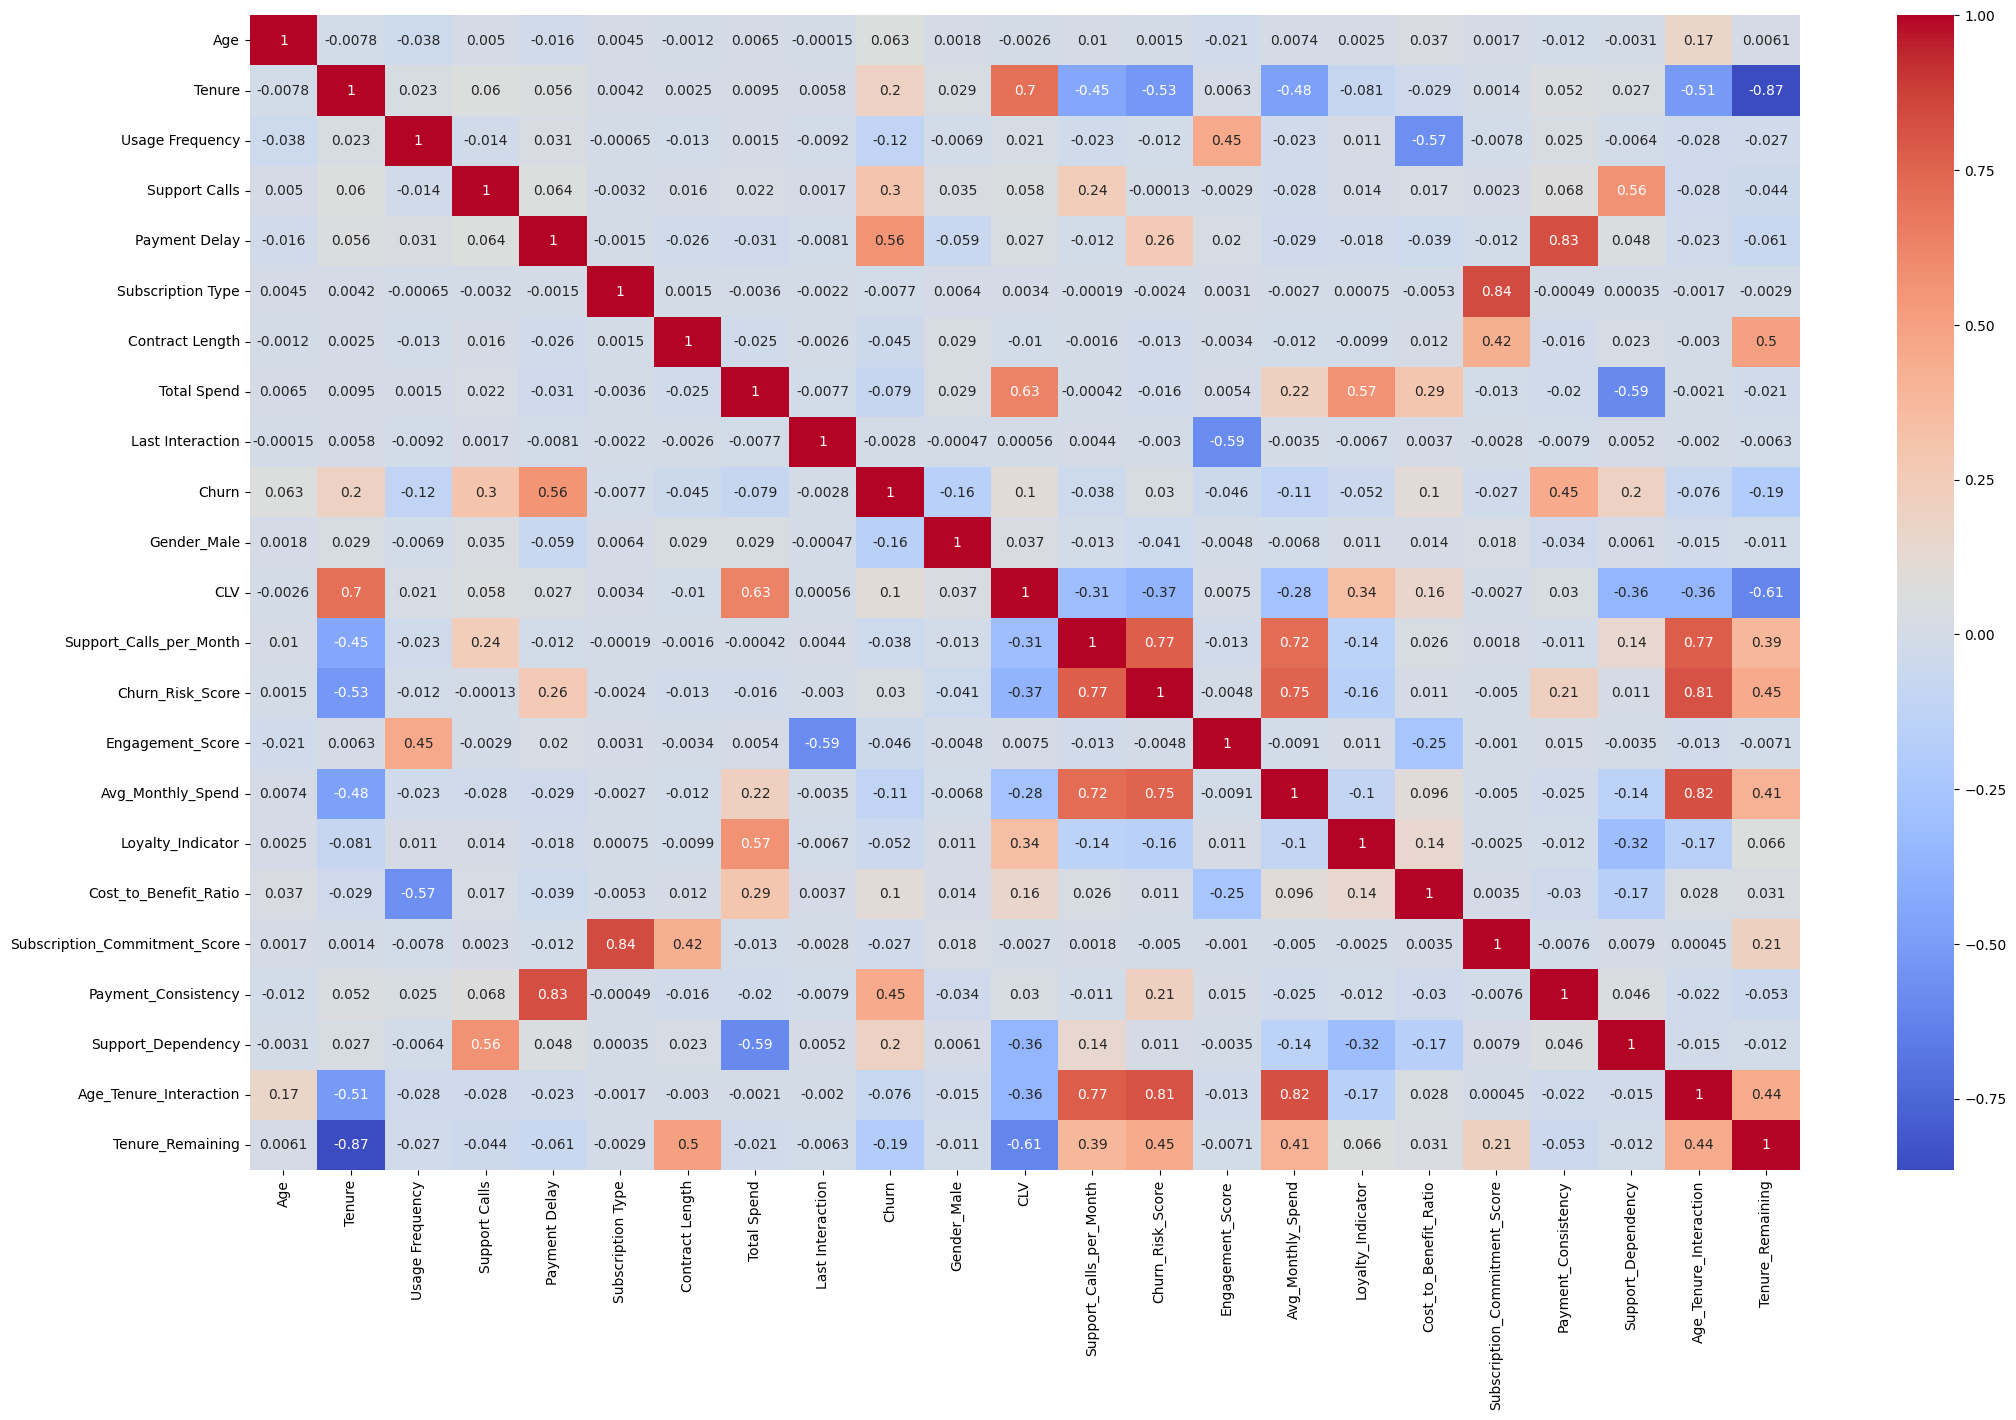

In [32]:
fig, ax= plt.subplots(figsize=(25,15))
corr_matrix= df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

###Feature Scaling : Min-Max Normalization

In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# List of continuous features
continuous_features = ['Total Spend', 'Usage Frequency', 'Payment Delay', 'Last Interaction']

# Min-Max Scaling
data_minmax_scaled = df.copy()
data_minmax_scaled[continuous_features] = min_max_scaler.fit_transform(df[continuous_features])

# Standardization
data_standardized = df.copy()
data_standardized[continuous_features] = standard_scaler.fit_transform(df[continuous_features])

# Display a preview of scaled datasets
data_minmax_scaled.head(), data_standardized.head()

(   Age  Tenure  Usage Frequency  Support Calls  Payment Delay  \
 0   22      25         0.448276              4       0.900000   
 1   41      28         0.931034              7       0.433333   
 2   47      27         0.310345              2       0.966667   
 3   35       9         0.379310              5       0.566667   
 4   53      58         0.793103              9       0.066667   
 
    Subscription Type  Contract Length  Total Spend  Last Interaction  Churn  \
 0                  0                1     0.553333          0.275862      1   
 1                  2                1     0.537778          0.655172      0   
 2                  1                3     0.730000          0.689655      0   
 3                  1                2     0.146667          0.586207      0   
 4                  2                3     0.481111          0.586207      0   
 
    ...  Churn_Risk_Score  Engagement_Score  Avg_Monthly_Spend  \
 0  ...          1.044615          1.400000          2

In [34]:
df.to_csv('Final_Data.csv', index=False)

##Exploratory Data Analysis

###Univariate Analysis - Analyzing each feature Separately

  Numerical features: Visualize distributions using histograms or box plots.
  
  Categorical features: Plot the frequency of categories with bar plots.

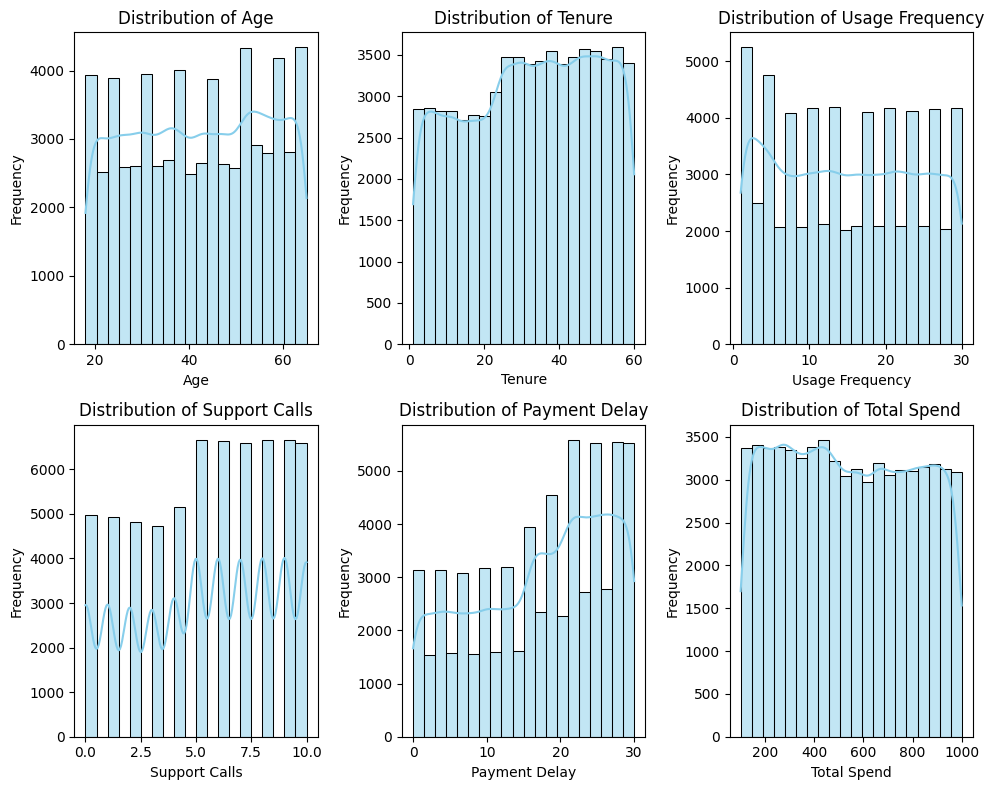

In [35]:
# Select numerical columns
numerical_columns = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend']

# Create a grid with 2 rows and 3 columns (3 graphs per row)
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each numerical feature in a separate subplot
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

**Key Observation**

**1. Distribution of Age:**

* The histogram shows a relatively uniform distribution of customer ages across the range of 20 to 60 years.
* There is a slight dip in the frequency around the mid-30s and a peak in the late 40s.
* Overall, the distribution suggests a diverse customer base in terms of age.

**2. Distribution of Tenure:**

* The distribution of tenure is also relatively uniform, with a slight increase in frequency for customers with tenure between 20 to 40 months.
* This indicates a good retention rate for customers who have been using the service for a moderate duration.

**3. Distribution of Usage Frequency:**

* The distribution of usage frequency shows a clear peak around 10-15.
* This suggests that a significant portion of customers use the service with this level of frequency.
* There is a gradual decrease in frequency for both higher and lower usage levels.

**4. Distribution of Support Calls:**

* The distribution of support calls is skewed towards the lower end.
* Most customers make a few support calls, with a significant drop in frequency for higher call volumes.
* This indicates that the majority of customers have minimal issues requiring support.

**5. Distribution of Payment Delay:**

* The distribution of payment delay shows a peak around 0, indicating that most customers pay on time.
* There is a gradual decrease in frequency as the payment delay increases.
* This suggests that the majority of customers are prompt in their payments.

**6. Distribution of Total Spend:**

* The distribution of total spend appears to be roughly normal, with a peak around the mid-range.
* This indicates that a large portion of customers spend a moderate amount on the service.
* There is a gradual decrease in frequency for both lower and higher spending levels.

**Overall Observation:**

* **Customer Demographics:** The customer base appears to be diverse in terms of age and has a good retention rate.
* **Service Usage:** Most customers use the service with moderate frequency and require minimal support.
* **Payment Behavior:** The majority of customers pay on time.
* **Spending Habits:** A significant portion of customers spend a moderate amount on the service.


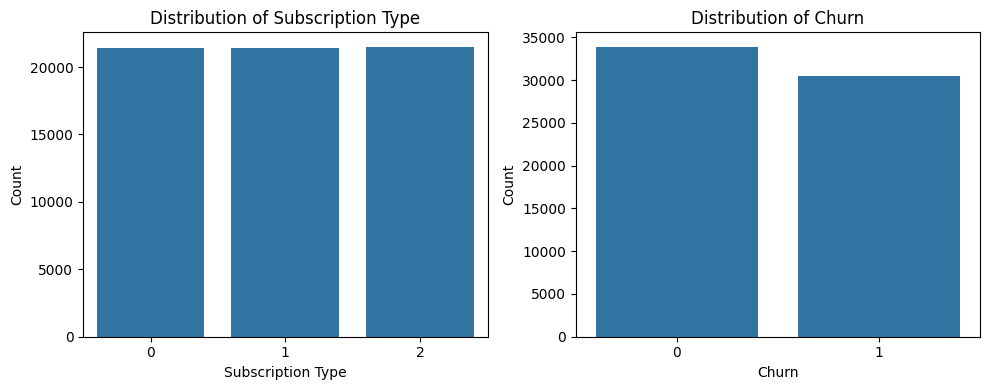

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a single row with 2 plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot for Subscription Type
sns.countplot(x='Subscription Type', data=df, ax=axes[0])
axes[0].set_title('Distribution of Subscription Type')
axes[0].set_xlabel('Subscription Type')
axes[0].set_ylabel('Count')

# Plot for Churn
sns.countplot(x='Churn', data=df, ax=axes[1])
axes[1].set_title('Distribution of Churn')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Count')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


**Key Observation**

**1. Distribution of Subscription Type:**

* The chart shows the distribution of customers across different subscription types.
* The bars appear to be of almost equal height, suggesting that the customer base is fairly evenly distributed across the different subscription types.
* Without specific labels for the subscription types, it's difficult to determine the exact breakdown.

**2. Distribution of Churn:**

* This chart illustrates the proportion of customers who have churned versus those who are still active.
* The bar representing customers who have not churned (0) is significantly taller than the bar for customers who have churned (1).
* This indicates that a majority of customers are still active subscribers.

**Overall Observation:**

* **Subscription Balance:** The company appears to have a balanced customer base across different subscription types.
* **Low Churn Rate:** The majority of customers are retained, suggesting a relatively low churn rate.



###Bivariate Analysis - Analyzing relationships between features

####Correlation matrix
For numerical features, plot a heatmap of correlations to identify multicollinearity.

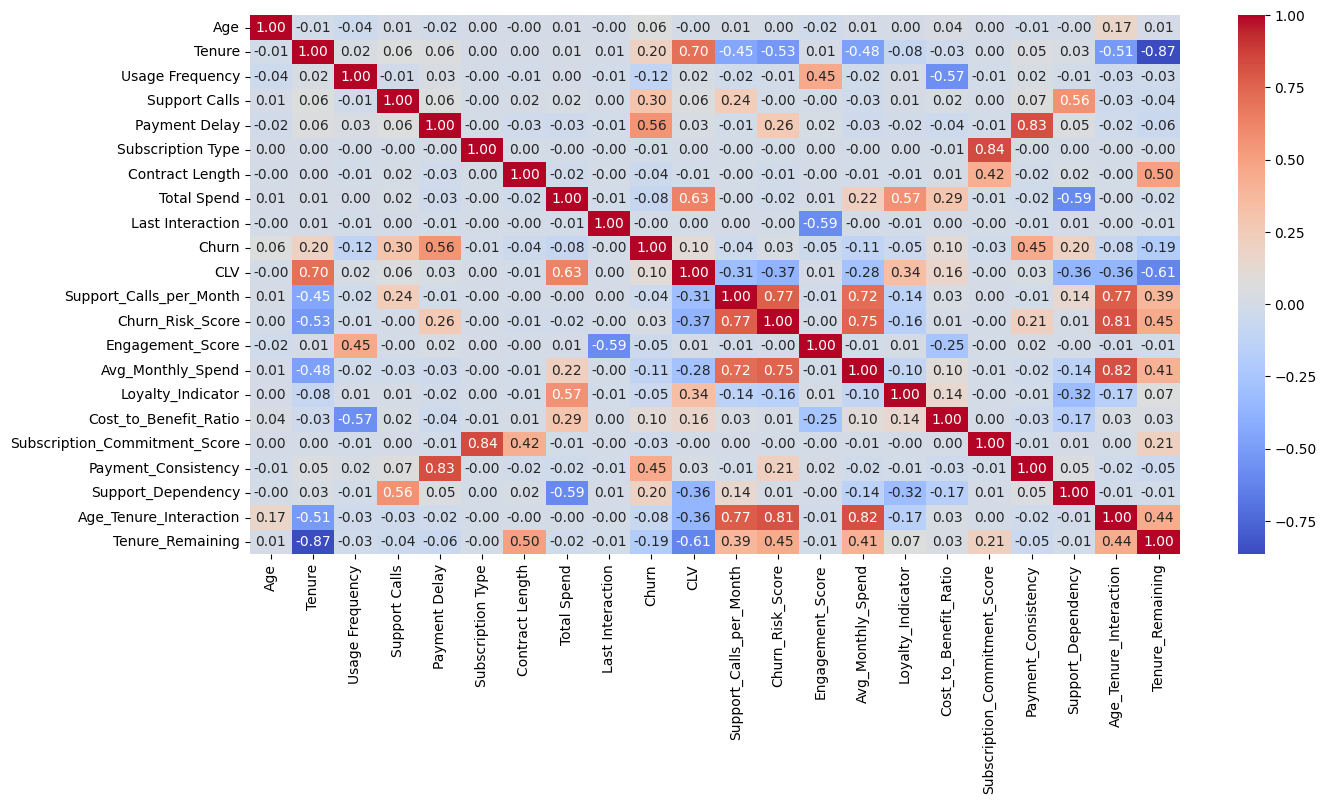

In [37]:
# Correlation matrix for numerical variables
numerical_df = df.select_dtypes(include=np.number)  # Select only numerical columns
plt.figure(figsize=(15, 7))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

**Key Observations:**

* **Tenure and CLV (Customer Lifetime Value):** There's a strong positive correlation between Tenure and CLV. This suggests that customers with longer tenure tend to have higher lifetime value.
* **Tenure and Churn:** Tenure has a moderate negative correlation with Churn. This indicates that customers with longer tenure are less likely to churn.
* **Support Calls and Churn Risk Score:** Support Calls have a moderate positive correlation with Churn Risk Score. This suggests that customers who make more support calls are more likely to churn.
* **Payment Delay and Churn Risk Score:** Payment Delay has a strong positive correlation with Churn Risk Score. This indicates that customers with payment delays are at a higher risk of churning.
* **Contract Length and Churn Risk Score:** Contract Length has a moderate negative correlation with Churn Risk Score. This suggests that customers with longer contracts are less likely to churn.
* **Total Spend and Churn Risk Score:** Total Spend has a moderate negative correlation with Churn Risk Score. This indicates that customers who spend more are less likely to churn.
* **Loyalty Indicator and Churn Risk Score:** Loyalty Indicator has a moderate positive correlation with Churn Risk Score. This suggests that customers with lower loyalty indicators are more likely to churn.

**Overall Observations:**

* **Strong Correlations:** There are several variables with strong positive or negative correlations. This indicates a significant relationship between these variables.
* **Moderate Correlations:** Some variables have moderate correlations, suggesting a weaker but still notable relationship.
* **Weak Correlations:** Many variables exhibit weak correlations, indicating a minimal or no relationship.


####Churn VS other variables
 Use box plots or bar plots to show how each feature behaves with respect to churn (target variable).

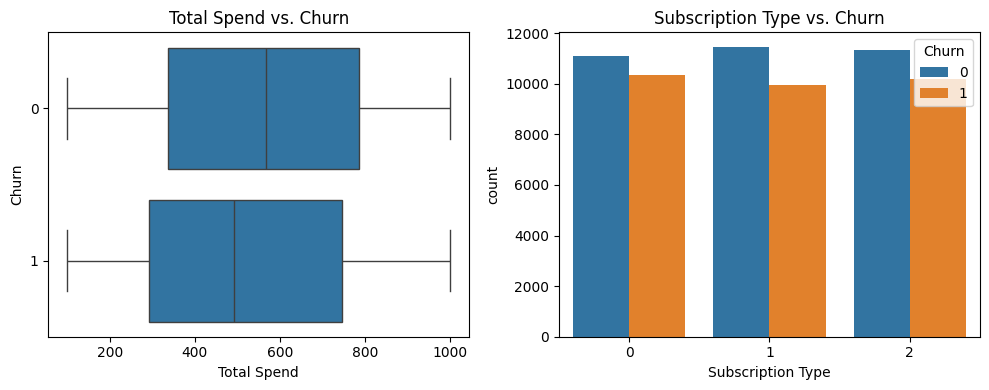

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Box plot (horizontal)
sns.boxplot(y='Churn', x='Total Spend', data=df, ax=axes[0], orient='h')
axes[0].set_title('Total Spend vs. Churn')

# Count plot
sns.countplot(x='Subscription Type', hue='Churn', data=df, ax=axes[1])
axes[1].set_title('Subscription Type vs. Churn')

# Adjust layout
plt.tight_layout()
plt.show()

**Key Observations:**

**1. Total Spend vs. Churn (Boxplot)**

* **Distribution:** The boxplots show the distribution of total spend for both churned (1) and non-churned (0) customers.
* **Median Spend:** The median spend for non-churned customers appears to be higher than that of churned customers.
* **Spread:** The interquartile ranges (boxes) for both groups are relatively similar, suggesting that the overall variability in spending is comparable between churned and non-churned customers.
* **Outliers:** There are some potential outliers in both groups, particularly in the churned customer group.

**Inference:**

* This plot suggests that customers with higher total spend are less likely to churn.

**2. Subscription Type vs. Churn (Countplot)**

* **Distribution:** The countplot shows the number of churned and non-churned customers for each subscription type (0, 1, and 2).
* **Churn Rate:** The proportion of churned customers seems to be higher for subscription type 1 compared to types 0 and 2.
* **Overall Churn:** The majority of customers in all subscription types have not churned.

**Inference:**

* This plot indicates that the churn rate varies across different subscription types. Subscription type 1 appears to have a higher churn rate compared to the other types.

**Overall Insights:**

* **Customer Value:** Customers with higher total spend are more valuable to the company and are less likely to churn.
* **Subscription Type Risk:** Subscription type 1 might require closer attention as it has a higher churn rate.
* **Retention Strategies:** Targeted retention strategies could be implemented for customers with lower total spend and those in subscription type 1.


###Churn Analysis


####Churn Rate
Calculating the overall churn rate to understand how many customers have churned.

In [39]:
churn_rate = df['Churn'].mean()
print(f"Churn Rate: {churn_rate:.2f}")

Churn Rate: 0.47


**Key Observation**

A churn rate of 0.47 means that 47% of your customers have churned (left your business) within a given time period. It means:

**High Churn Rate:** A churn rate of 0.47 is generally considered high, especially for businesses that rely on recurring revenue. This indicates that a significant portion of your customer base is not being retained.

**Financial Impact:** High churn can have a significant negative impact on your revenue and profitability. Losing 47% of your customers can lead to a substantial drop in revenue and make it difficult to sustain growth.

**Customer Value:** A high churn rate often suggests that you are not providing enough value to your customers to keep them engaged. It could indicate issues with product quality, customer service, pricing, or other factors that are causing customers to leave.




####Churn by features
Analyze churn based on different features like Subscription Type, Age Group, etc.

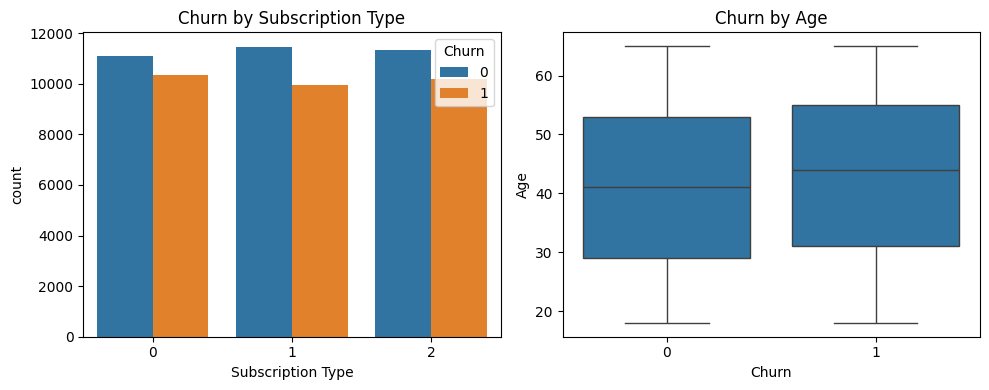

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Churn by Subscription Type
sns.countplot(x='Subscription Type', hue='Churn', data=df, ax=axes[0])
axes[0].set_title('Churn by Subscription Type')

# Churn by Age - Correcting the column name to 'Age'
sns.boxplot(x='Churn', y='Age', data=df, ax=axes[1])  # Changed 'Customer Age' to 'Age'
axes[1].set_title('Churn by Age')

# Adjust layout
plt.tight_layout()
plt.show()

**Key Observations:**

**1. Churn by Subscription Type**

* **Distribution:** The countplot shows the number of churned and non-churned customers for each subscription type (0, 1, and 2).
* **Churn Rate:** The proportion of churned customers seems to be higher for subscription type 1 compared to types 0 and 2.
* **Overall Churn:** The majority of customers in all subscription types have not churned.

**Inference:**

* This plot indicates that the churn rate varies across different subscription types. Subscription type 1 appears to have a higher churn rate compared to the other types.

**2. Churn by Age**

* **Distribution:** The boxplot shows the distribution of customer ages for both churned and non-churned groups.
* **Median Age:** The median age appears to be similar for both churned and non-churned customers.
* **Spread:** The interquartile ranges (boxes) for both groups are relatively similar, suggesting that the overall age distribution is comparable between churned and non-churned customers.
* **Outliers:** There are some potential outliers in both groups, particularly in the churned customer group.

**Inference:**

* This plot suggests that age may not be a significant factor in predicting churn in this dataset. While there are some outliers, the overall age distribution is similar for both churned and non-churned customers.

**Overall Observations:**

* **Subscription Type Risk:** Subscription type 1 might require closer attention as it has a higher churn rate.
* **Age as a Factor:** Age does not appear to be a strong predictor of churn in this dataset.




###Outlier Detection:


#### Detecting Outliers

In [41]:
numerical_columns = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
                     'Total Spend', 'Last Interaction', 'CLV', 'Support_Calls_per_Month',
                     'Churn_Risk_Score', 'Engagement_Score', 'Avg_Monthly_Spend',
                     'Cost_to_Benefit_Ratio', 'Support_Dependency', 'Age_Tenure_Interaction']


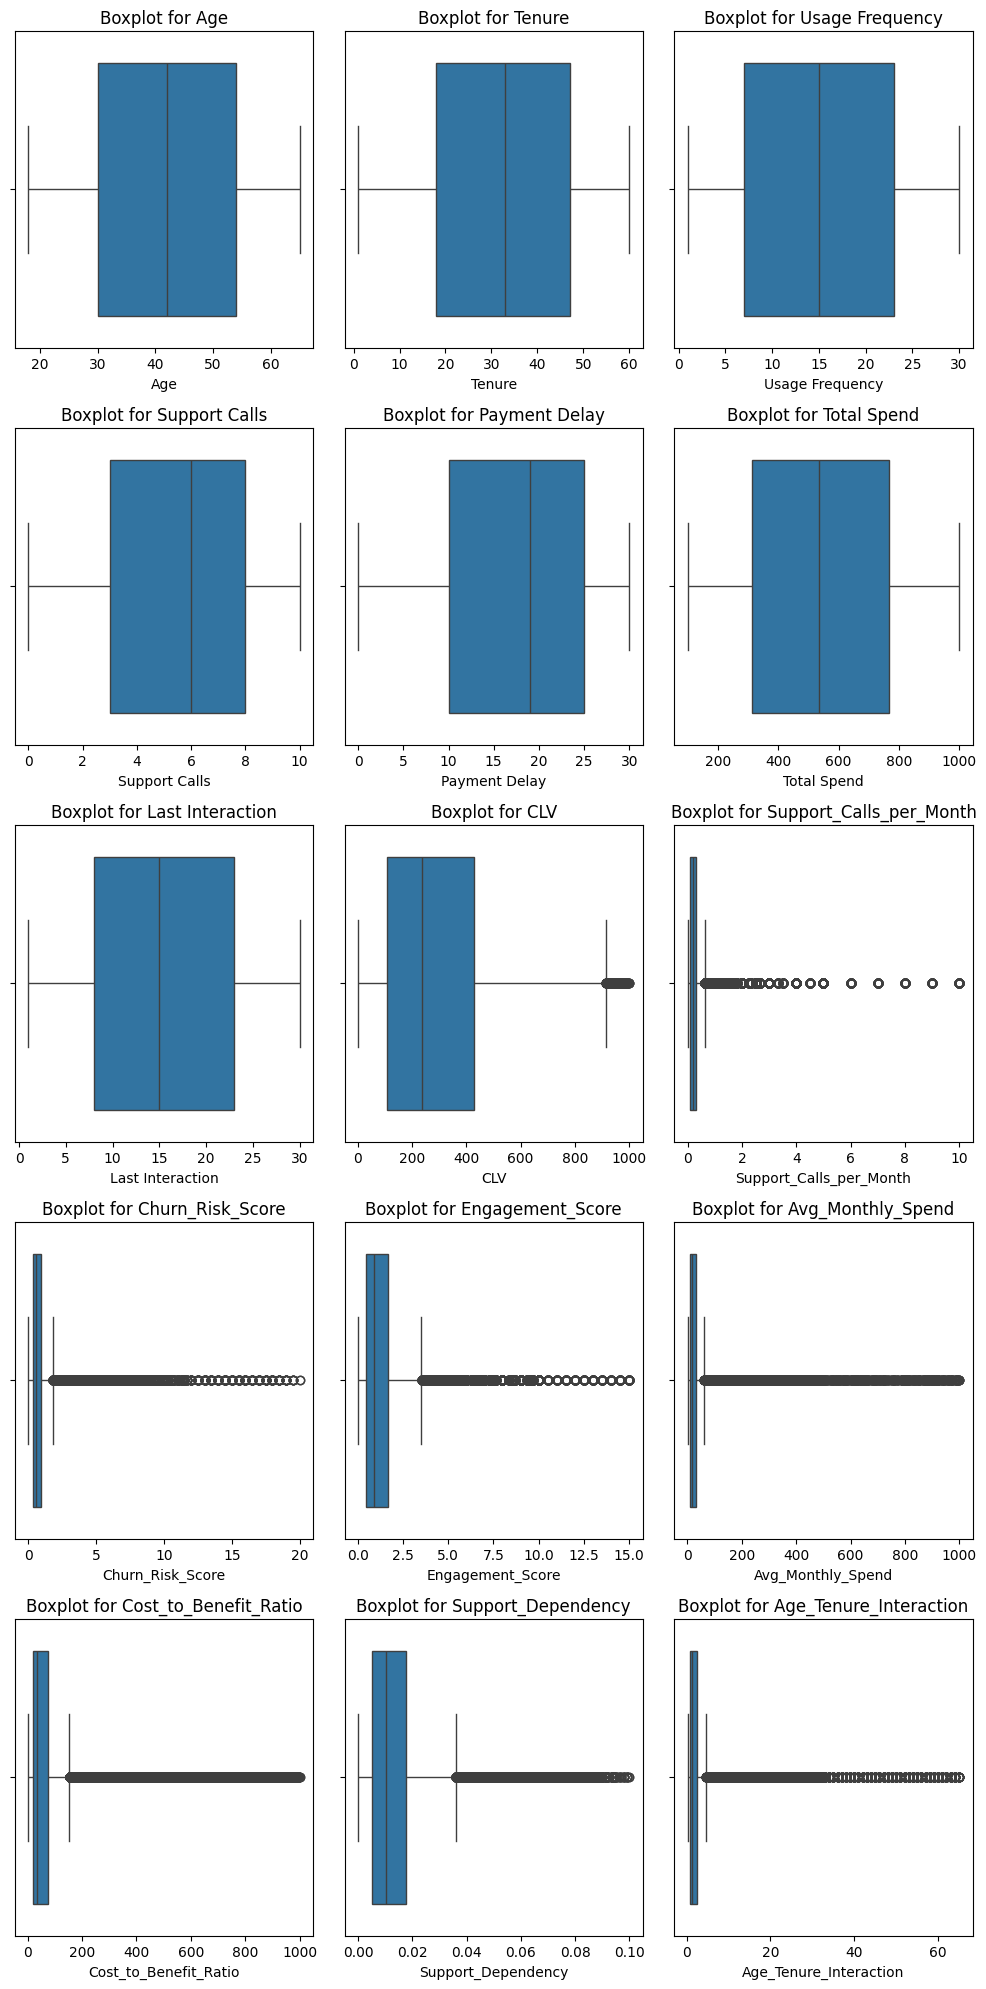

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of plots in a row
plots_per_row = 3

# Calculate the number of rows needed
num_rows = int(np.ceil(len(numerical_columns) / plots_per_row))

# Create a figure and axes
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(10, 4 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through numerical columns and create box plots
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

**Key Observation**

**1. Age:** The boxplot for Age shows a relatively symmetric distribution with no significant outliers.

**2. Tenure:** The boxplot for Tenure shows a symmetric distribution with no significant outliers.

**3. Usage Frequency:** The boxplot for Usage Frequency shows a symmetric distribution with no significant outliers.

**4. Support Calls:** The boxplot for Support Calls shows a symmetric distribution with no significant outliers.

**5. Payment Delay:** The boxplot for Payment Delay shows a slightly right-skewed distribution with a few potential outliers on the higher end.

**6. Total Spend:** The boxplot for Total Spend shows a slightly right-skewed distribution with a few potential outliers on the higher end.

**7. Last Interaction:** The boxplot for Last Interaction shows a symmetric distribution with no significant outliers.

**8. CLV (Customer Lifetime Value):** The boxplot for CLV shows a right-skewed distribution with a few potential outliers on the higher end, indicating a few customers with exceptionally high lifetime value.

**9. Support Calls per Month:** The boxplot for Support Calls per Month shows a right-skewed distribution with several potential outliers on the higher end, indicating a few customers who make an unusually high number of support calls.

**10. Churn Risk Score:** The boxplot for Churn Risk Score shows a right-skewed distribution with a few potential outliers on the higher end, indicating a few customers with extremely high churn risk.

**11. Engagement Score:** The boxplot for Engagement Score shows a right-skewed distribution with a few potential outliers on the higher end, indicating a few customers with exceptionally high engagement.

**12. Avg. Monthly Spend:** The boxplot for Avg. Monthly Spend shows a right-skewed distribution with a few potential outliers on the higher end, indicating a few customers with very high average monthly spending.

**13. Cost_to_Benefit_Ratio:** The boxplot for Cost_to_Benefit_Ratio shows a right-skewed distribution with a few potential outliers on the higher end. This indicates that there are a few customers with exceptionally high cost-to-benefit ratios.

**14. Support_Dependency:** The boxplot for Support_Dependency shows a right-skewed distribution with a few potential outliers on the higher end. This indicates that there are a few customers with exceptionally high support dependency.

**15. Age_Tenure_Interaction:** The boxplot for Age_Tenure_Interaction also shows a right-skewed distribution with a few potential outliers on the higher end. This indicates that there are a few customers with an unusually high interaction between their age and tenure.



####Handling Outliers - Winsorization
Winsorization, a technique where you cap or push the outliers within a specific range, such as the range defined by the whiskers of the boxplot.

**What is Winsorization?**
Winsorization limits the extreme values by replacing them with the nearest value within the specified range (like the 5th and 95th percentiles or IQR-based whiskers).

This approach doesn’t remove any data points but ensures outliers don’t disproportionately affect your analysis.

Working:

  Determine the Range: Use the interquartile range (IQR) to calculate the whiskers:

*   Lower bound = Q1−1.5×IQRQ1−1.5×IQR
*   Upper bound = Q3+1.5×IQRQ3+1.5×IQR


Cap Values: Replace values below the lower bound with the lower bound and values above the upper bound with the upper bound.

In [43]:
def winsorize_column(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower whisker
    upper_bound = Q3 + 1.5 * IQR  # Upper whisker

    # Winsorize: Cap values outside the bounds
    df[column] = df[column].apply(lambda x: max(lower_bound, min(x, upper_bound)))
    return df

# Apply Winsorization to all columns with outliers
columns_to_winsorize = [
    'Support_Calls_per_Month', 'Churn_Risk_Score', 'Engagement_Score',
    'Avg_Monthly_Spend', 'Cost_to_Benefit_Ratio', 'Support_Dependency',
    'Age_Tenure_Interaction'
]

for col in columns_to_winsorize:
    df = winsorize_column(df, col)

print("Outliers have been capped using Winsorization.")

Outliers have been capped using Winsorization.


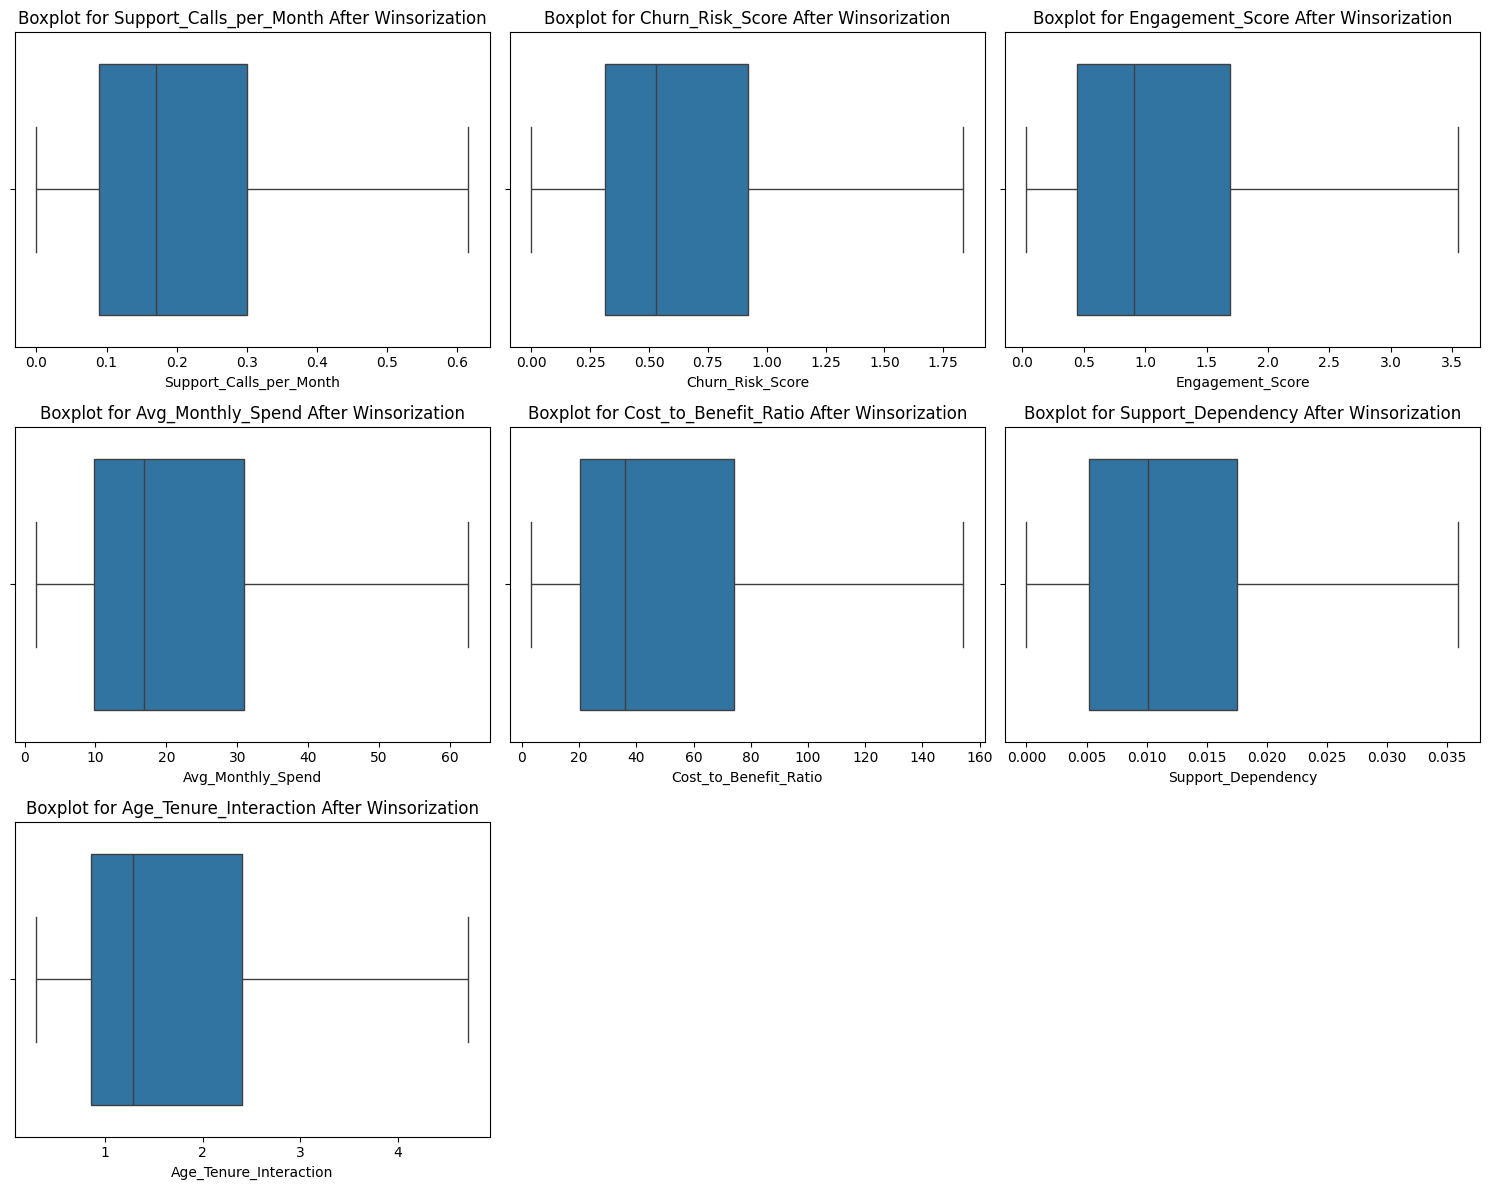

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Number of plots per row
plots_per_row = 3

# Calculate the number of rows needed
num_rows = math.ceil(len(columns_to_winsorize) / plots_per_row)

# Create a figure and axes
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 4 * num_rows))  # Adjust figsize for wider plots

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through columns and create box plots
for i, col in enumerate(columns_to_winsorize):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col} After Winsorization')

# Hide any unused subplots (if the number of columns isn't divisible by 3)
for i in range(len(columns_to_winsorize), len(axes)):
    axes[i].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

##Splitting the Dataset

In [45]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop(columns=['Churn'])  # Replace 'Churn' with your target column name
y = df['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

####K Nearest Neighbours

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
train_predictions = knn.predict(X_train)
test_predictions = knn.predict(X_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"KNN Training Accuracy: {train_accuracy:.2f}")
print(f"KNN Testing Accuracy: {test_accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("\nConfusion Matrix for KNN on Test Set:")
print(conf_matrix)

#Classification Report
print("\nClassification Report for KNN on Test Set:")
print(classification_report(y_test, test_predictions))

KNN Training Accuracy: 0.85
KNN Testing Accuracy: 0.77

Confusion Matrix for KNN on Test Set:
[[5055 1721]
 [1234 4865]]

Classification Report for KNN on Test Set:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      6776
           1       0.74      0.80      0.77      6099

    accuracy                           0.77     12875
   macro avg       0.77      0.77      0.77     12875
weighted avg       0.77      0.77      0.77     12875



**Observations from KNN Model Performance**

1. **Accuracy Observation:**The training accuracy is 85%, while the testing accuracy drops to 77%, indicating a slight overfitting of the model.
2. **Confusion Matrix Insight:** The model correctly classified 5055 negative and 4865 positive instances. There were 1721 false positives and 1234 false negatives, indicating some errors in class prediction.
3. **Precision and Recall Analysis:** Precision for class 0 i.e no churn(80%) is higher than for class 1 i.e churn (74%), indicating that the model is better at predicting class 0 correctly. Recall for class 1 (80%) is higher than for class 0 (75%), meaning it identifies positive instances better.
4. **F1-Score:** The F1-score is balanced at 77% for both classes, showing an even trade-off between precision and recall.


**Overall Model Insight:**
The KNN classifier performs reasonably well but shows potential for improvement due to the noticeable gap between training and testing accuracy and the presence of misclassifications.

###Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
train_predictions_nb = nb.predict(X_train)
test_predictions_nb = nb.predict(X_test)

# Accuracy Scores
train_accuracy_nb = accuracy_score(y_train, train_predictions_nb)
test_accuracy_nb = accuracy_score(y_test, test_predictions_nb)

print(f"Naive Bayes Training Accuracy: {train_accuracy_nb:.2f}")
print(f"Naive Bayes Testing Accuracy: {test_accuracy_nb:.2f}")

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, test_predictions_nb)
print("\nConfusion Matrix for Naive Bayes on Test Set:")
print(conf_matrix_nb)

# Classification Report
print("\nClassification Report for Naive Bayes on Test Set:")
print(classification_report(y_test, test_predictions_nb))

Naive Bayes Training Accuracy: 0.77
Naive Bayes Testing Accuracy: 0.77

Confusion Matrix for Naive Bayes on Test Set:
[[4762 2014]
 [ 949 5150]]

Classification Report for Naive Bayes on Test Set:
              precision    recall  f1-score   support

           0       0.83      0.70      0.76      6776
           1       0.72      0.84      0.78      6099

    accuracy                           0.77     12875
   macro avg       0.78      0.77      0.77     12875
weighted avg       0.78      0.77      0.77     12875



**Observations from Naive Bayes Model Performance**

1. **Accuracy Observation:**  
   - The model achieved **77% accuracy** on both the training and testing datasets, indicating a well-generalized model with minimal overfitting.

2. **Confusion Matrix Analysis:**  
   - **True Negatives (4762)**: Correctly predicted class `0` instances.  
   - **True Positives (5150)**: Correctly predicted class `1` instances.  
   - **False Positives (2014)**: Incorrectly predicted class `1` instead of `0`.  
   - **False Negatives (949)**: Incorrectly predicted class `0` instead of `1`.  
   - There are relatively more **false positives**, suggesting that the model sometimes predicts churn incorrectly.

3. **Classification Report Insights:**  
   - **Precision:** Higher for class `0` (83%) compared to class `1` (72%), indicating the model's better confidence in negative class predictions.  
   - **Recall:** Higher for class `1` (84%) than class `0` (70%), showing the model's better ability to identify positive class instances.  
   - **F1-Score:** Balanced at **76% for Class 0** and **78% for Class 1**, demonstrating a reasonable trade-off between precision and recall.

4. **Overall Model Observation:**  
   - The Naive Bayes model shows good generalization with balanced class predictions.  
   - There is room for improvement in reducing false positives and enhancing precision for class `1`.

###Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
train_predictions_dt = dt.predict(X_train)
test_predictions_dt = dt.predict(X_test)

# Accuracy Scores
train_accuracy_dt = accuracy_score(y_train, train_predictions_dt)
test_accuracy_dt = accuracy_score(y_test, test_predictions_dt)

print(f"Decision Tree Training Accuracy: {train_accuracy_dt:.2f}")
print(f"Decision Tree Testing Accuracy: {test_accuracy_dt:.2f}")

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, test_predictions_dt)
print("\nConfusion Matrix for Decision Tree on Test Set:")
print(conf_matrix_dt)

# Classification Report
print("\nClassification Report for Decision Tree on Test Set:")
print(classification_report(y_test, test_predictions_dt))

Decision Tree Training Accuracy: 1.00
Decision Tree Testing Accuracy: 1.00

Confusion Matrix for Decision Tree on Test Set:
[[6761   15]
 [  17 6082]]

Classification Report for Decision Tree on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6776
           1       1.00      1.00      1.00      6099

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875



**Observations from Decision Tree Classifier Performance**

1. **Accuracy Observation:**  
   - The Decision Tree model achieved **100% accuracy** on both the training and testing datasets. This highly unusual outcome indicates the model may have memorized the training data rather than learning generalizable patterns.

2. **Confusion Matrix Analysis:**  
   - **True Negatives (6761)** and **True Positives (6082)** indicate accurate predictions for both classes.  
   - **False Positives (15)** and **False Negatives (17)** are minimal, suggesting near-perfect classification.

3. **Classification Report Insights:**  
   - Precision, recall, and F1-scores are all **1.00** for both classes, indicating perfect performance across all metrics.

4. **Model Observation:**  
   - The **100% accuracy** strongly suggests **overfitting**, where the model captures noise or specific patterns in the training data rather than generalizable trends.  
   - Decision Trees often face this issue when they are not pruned or restricted in depth.

####Hyperparameter Tunning

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Parameter distributions for RandomizedSearchCV
param_dist = {
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 15),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy']
}

# RandomizedSearchCV with fewer iterations and 3-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=50,  # number of parameter combinations to try
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and accuracy
print(f"Best Parameters: {random_search.best_params_}")
print(f"Training Accuracy with Best Parameters: {random_search.best_score_:.2f}")

# Evaluate on test data
best_dt = random_search.best_estimator_
test_accuracy = best_dt.score(X_test, y_test)
print(f"Testing Accuracy with Best Parameters: {test_accuracy:.2f}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 2}
Training Accuracy with Best Parameters: 1.00
Testing Accuracy with Best Parameters: 1.00


**Observations**

1. Achieving 100% training and testing accuracy with a Decision Tree, even after hyperparameter tuning, strongly suggests that the model may still be overfitting despite using constraints such as max_depth, min_samples_split, and min_samples_leaf
2. The current hyperparameters may not sufficiently limit the complexity of the tree, allowing it to perfectly memorize the data.
3. Decision Trees can naturally lead to perfect splits on smaller datasets or in cases where the features are too informative.

####Prunned Decision Tree

In [50]:
pruned_tree = DecisionTreeClassifier(
    max_depth=6,  # lower depth
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
pruned_tree.fit(X_train, y_train)

print(f"Pruned Decision Tree Training Accuracy: {pruned_tree.score(X_train, y_train):.2f}")
print(f"Pruned Decision Tree Testing Accuracy: {pruned_tree.score(X_test, y_test):.2f}")

Pruned Decision Tree Training Accuracy: 0.98
Pruned Decision Tree Testing Accuracy: 0.98


**Observations**

**1. Reduced Overfitting:** By limiting the depth and increasing the minimum sample constraints, the model generalized better while avoiding memorizing the training data.

**2. High Accuracy:** A 98% accuracy is excellent, although it's worth investigating if it's due to data characteristics (like strong feature predictability) or remaining subtle overfitting.